# Coordinate Reference Systems for mapping applications: Jupiter & Saturn System satellites

**_A companion to the CRS introduction for the 2024 GMAP Winter School_**

Using eitehr Desktop or Juputeb-based mapping tools, and ancillary data such as USGS/IAU Gazetteer nomenclature can be tricky, due to different CRS used (or popular, or mandated) across different systems. The present notebook is not exhaustive, but tries to point to resources. A very useful resource is the [planetary coverage](https://docs.planetary-coverage.org/) python package (Seignovert, et al, 2023).

See also e.g. 
* https://sbn.psi.edu/mc-f2f/2017/presentations/Europa%20Clipper%20Coordinate%20System%20Convention%2020170803.pdf
* https://en.wikipedia.org/wiki/Planetary_coordinate_system


In [1]:
import matplotlib.pyplot as plt
from planetary_coverage import GANYMEDE, CALLISTO, TITAN

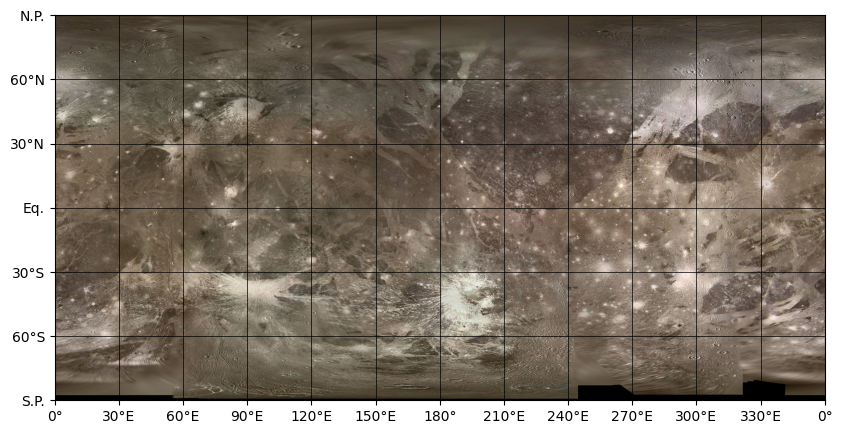

In [2]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=GANYMEDE)

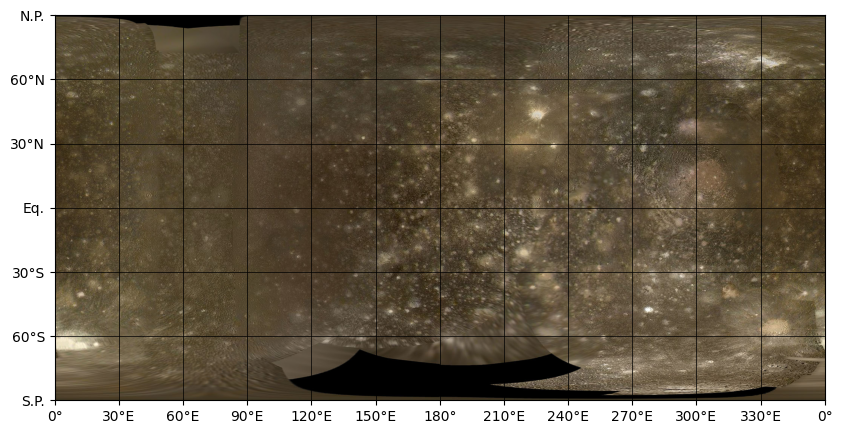

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=CALLISTO)

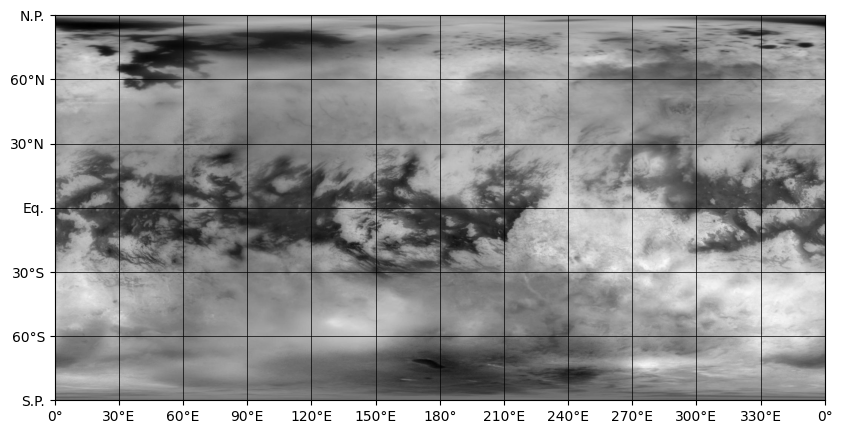

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=TITAN)

One can use custom CRS without necessarily using default planetary-coverabe maps.

One can use the -180/180, East+ (i.e. converted from originally 0-360, West+) toponynims over Ganymede, see also [CRS Intro](./0_crs_intro.ipynb)

In [12]:
# load as geopackage
import geopandas as gpd

# reading a local geopackage
ganymede_toponyms = gpd.read_file('./data/ganymede_nomenclature.gpkg', layer='toponyms', driver="GPKG")


In [13]:
ganymede_toponyms.head(2)

,Feature Name,Target,Diameter,Center Latitude,Center Longitude,Coordinate System,Approval Status,Approval Date,Origin,Center Longitude 180,Center Longitude_180_E+,geometry
0,Abydos Facula,Ganymede,180.0,33.33,153.44,"Planetographic, +West, 0 - 360",Approved,1985,Egyptian town where Osiris was worshipped.,153.44,-153.44,POINT (-153.44000 33.33000)
1,Achelous,Ganymede,40.0,61.90,11.78,"Planetographic, +West, 0 - 360",Approved,1979,"Greek river god; father of Callirrhoe, Ganymed...",11.78,-11.78,POINT (-11.78000 61.90000)


<Axes: >

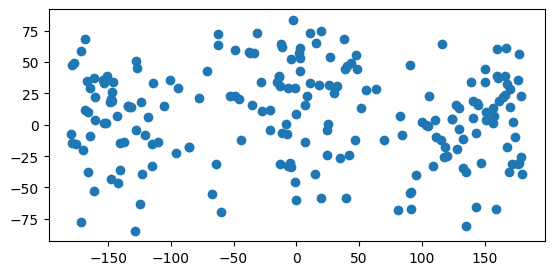

In [14]:
ganymede_toponyms.plot()

One could plot by hand individual entries e.g. from the toponyms (making sure to use the right longitude...).

E..g a very well visible crater with rays: [Tros](https://www.missionjuno.swri.edu/junocam/processing?id=10742)

one can search it:

In [15]:
ganymede_toponyms.query('`Feature Name` == "Tros"')

,Feature Name,Target,Diameter,Center Latitude,Center Longitude,Coordinate System,Approval Status,Approval Date,Origin,Center Longitude 180,Center Longitude_180_E+,geometry
190,Tros,Ganymede,94.0,11.14,27.26,"Planetographic, +West, 0 - 360",Approved,1979,Greek; father of Ganymede.,27.26,-27.26,POINT (-27.26000 11.14000)


In this case, we try to use the Center Longitude 180 E+ (i.e. 

In [16]:
lons_e, lats = [-27.26], [11.14]

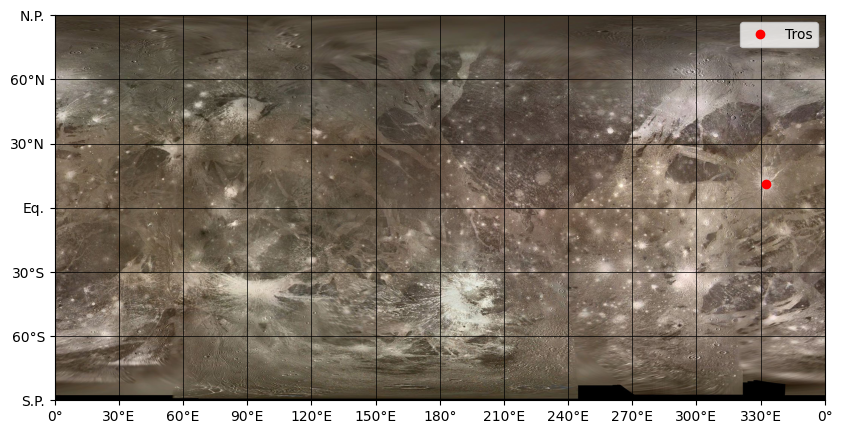

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=GANYMEDE)
ax.plot(lons_e, lats, 'o', color='red', label="Tros")
ax.legend()

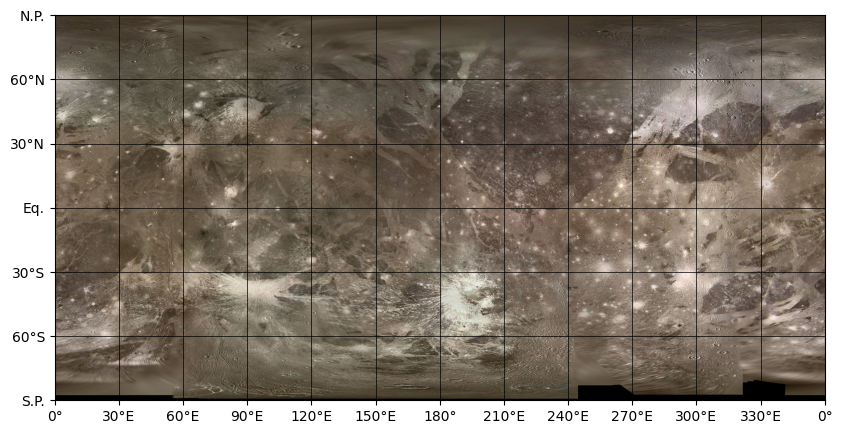

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=GANYMEDE)

In order to take advantage of more map projection options, the approach exemplified in other notebooks in [this repo](https://github.com/europlanet-gmap/winter-school-2024/tree/main/crs/notebooks) can be applied, using Cartopy.

## References

References quoted in this notebook or relevant for the content are listed below. They are collected and collated with others on the repository: 

https://github.com/europlanet-gmap/winter-school-2024/tree/main/crs

--- 
Annex et al., (2020). SpiceyPy: a Pythonic Wrapper for the SPICE Toolkit. Journal of Open Source Software, 5(46), 2050, https://doi.org/10.21105/joss.02050

Archinal, B.A., Acton, C.H., A’Hearn, M.F. et al. Report of the IAU Working Group on Cartographic Coordinates and Rotational Elements: 2015. Celest Mech Dyn Astr 130, 22 (2018). https://doi.org/10.1007/s10569-017-9805-5

Hare, T. M., & Malapert, J. C. (2021). Standards Proposal for 2021 to Support Planetary Coordinate Reference Systems for Open Geospatial Web Services. LPI Contributions, 2549, 7012 - http://voparis-vespa-crs.obspm.fr:8080/web/ - http://www.opengis.net/def/crs/IAU/2015

Seignovert et al. (2023) Planetary coverage package (1.1.0), [planetary-coverage.org](https://docs.planetary-coverage.org/en/1.1.0/), [swh:1:rel:f6280865fc5144b4beadc04d4085385f7a58491d](https://archive.softwareheritage.org/browse/origin/directory/?origin_url=https://juigitlab.esac.esa.int/python/planetary-coverage&release=1.1.0)

Snyder (1987) Map projections: A working manual - https://pubs.er.usgs.gov/publication/pp1395 / https://doi.org/10.3133/pp1395


## Links and internet resources

* Spicepy - https://pypi.org/project/spicepy/
  * https://github.com/AndrewAnnex/SpiceyPy
* Planetary-coverage python package - https://docs.planetary-coverage.org
  * https://juigitlab.esac.esa.int/python/planetary-coverage